In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [3]:

freshness_data_dir = r'C:\Users\advai\OneDrive\Desktop\flipkart hackathon\freshness'
shelf_life_data_dir = r'C:\Users\advai\OneDrive\Desktop\flipkart hackathon\fruit_shelf'


In [4]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32


In [5]:
freshness_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  
)

freshness_train_generator = freshness_datagen.flow_from_directory(
    freshness_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training'
)

freshness_validation_generator = freshness_datagen.flow_from_directory(
    freshness_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation'
)


Found 18901 images belonging to 18 classes.
Found 4718 images belonging to 18 classes.


In [6]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))  
    return model


In [7]:
freshness_model = create_cnn_model((IMG_HEIGHT, IMG_WIDTH, 3), len(freshness_train_generator.class_indices))
freshness_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


print("Training Freshness Model...")
freshness_model.fit(
    freshness_train_generator,
    validation_data=freshness_validation_generator,
    epochs=10
)


c:\Users\advai\anaconda3\envs\TradeTravern\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Freshness Model...
Epoch 1/10


c:\Users\advai\anaconda3\envs\TradeTravern\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


591/591 ━━━━━━━━━━━━━━━━━━━━ 242s 405ms/step - accuracy: 0.6630 - loss: 1.0171 - val_accuracy: 0.7575 - val_loss: 0.7703
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 260s 438ms/step - accuracy: 0.8990 - loss: 0.2860 - val_accuracy: 0.7658 - val_loss: 0.6493
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 200s 337ms/step - accuracy: 0.9375 - loss: 0.1649 - val_accuracy: 0.7969 - val_loss: 0.6601
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 240s 405ms/step - accuracy: 0.9547 - loss: 0.1263 - val_accuracy: 0.8133 - val_loss: 0.6971
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 200s 337ms/step - accuracy: 0.9737 - loss: 0.0734 - val_accuracy: 0.7827 - val_loss: 1.0433
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 194s 327ms/step - accuracy: 0.9762 - loss: 0.0723 - val_accuracy: 0.8143 - val_loss: 0.8805
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 214s 361ms/step - accuracy: 0.9840 - loss: 0.0446 - val_accuracy: 0.8398 - val_loss: 0.8065
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 194s 326ms/step - accuracy: 0.9870 - loss: 0.03

In [8]:

shelf_life_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2 
)

shelf_life_train_generator = shelf_life_datagen.flow_from_directory(
    shelf_life_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training'
)

shelf_life_validation_generator = shelf_life_datagen.flow_from_directory(
    shelf_life_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation'
)


Found 1554 images belonging to 14 classes.
Found 381 images belonging to 14 classes.


In [9]:

shelf_life_model = create_cnn_model((IMG_HEIGHT, IMG_WIDTH, 3), len(shelf_life_train_generator.class_indices))
shelf_life_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


print("Training Shelf Life Model...")
shelf_life_model.fit(
    shelf_life_train_generator,
    validation_data=shelf_life_validation_generator,
    epochs=10
)


Training Shelf Life Model...
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 657ms/step - accuracy: 0.3847 - loss: 1.9486 - val_accuracy: 0.5197 - val_loss: 1.2962
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 354ms/step - accuracy: 0.7284 - loss: 0.7020 - val_accuracy: 0.6850 - val_loss: 1.0715
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 333ms/step - accuracy: 0.8010 - loss: 0.5272 - val_accuracy: 0.7192 - val_loss: 1.0982
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 322ms/step - accuracy: 0.8584 - loss: 0.3721 - val_accuracy: 0.6850 - val_loss: 1.2966
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 328ms/step - accuracy: 0.8472 - loss: 0.3754 - val_accuracy: 0.6929 - val_loss: 1.2037
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 323ms/step - accuracy: 0.8675 - loss: 0.3554 - val_accuracy: 0.7585 - val_loss: 1.0625
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 328ms/step - accuracy: 0.9112 - loss: 0.2504 - val_accuracy: 0.7769 - val_loss: 1.0473
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 341ms/step - accuracy: 0.8

In [10]:

freshness_loss, freshness_accuracy = freshness_model.evaluate(freshness_validation_generator)
print(f'Freshness Model - Loss: {freshness_loss:.4f}, Accuracy: {freshness_accuracy:.4f}')

shelf_life_loss, shelf_life_accuracy = shelf_life_model.evaluate(shelf_life_validation_generator)
print(f'Shelf Life Model - Loss: {shelf_life_loss:.4f}, Accuracy: {shelf_life_accuracy:.4f}')


148/148 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - accuracy: 0.8054 - loss: 1.0723
Freshness Model - Loss: 1.1566, Accuracy: 0.7995
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.7349 - loss: 1.2551
Shelf Life Model - Loss: 1.1423, Accuracy: 0.7664


In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


freshness_class_indices = {
    0: 'Fresh Apples',
    1: 'Fresh Banana',
    2: 'Fresh Bitter Gourd',
    3: 'Fresh Capsicum',
    4: 'Fresh Cucumber',
    5: 'Fresh Okra',
    6: 'Fresh Oranges',
    7: 'Fresh Potato',
    8: 'Fresh Tomato',
    9: 'Rotten Apples',
    10: 'Rotten Banana',
    11: 'Rotten Bitter Gourd',
    12: 'Rotten Capsicum',
    13: 'Rotten Cucumber',
    14: 'Rotten Okra',
    15: 'Rotten Oranges',
    16: 'Rotten Potato',
    17: 'Rotten Tomato'
}


shelf_life_class_days = {
    0: 5,   
    1: 14,   
    2: 10,
    3: 5,    
    4: 15,
    5: 20,
    6: 10,
    7: 2,    
    8: 4,
    9: 6,    
    10: 0,   
    11: 5,   
    12: 15,  
    13: 10   
}

# Prepare the image function
def prepare_image(file_path):
    img = image.load_img(file_path, target_size=(IMG_HEIGHT, IMG_WIDTH)) 
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0 
    return img_array


def predict_freshness_and_shelf_life(image_path):

    prepared_image = prepare_image(image_path)
 
    freshness_prediction = freshness_model.predict(prepared_image)
    freshness_class = np.argmax(freshness_prediction, axis=-1)
    

    shelf_life_prediction = shelf_life_model.predict(prepared_image)
    shelf_life_class = np.argmax(shelf_life_prediction, axis=-1)

    return freshness_class, shelf_life_class

def display_prediction(image_path):
    freshness_class, shelf_life_class = predict_freshness_and_shelf_life(image_path)

    # Load and display the image
    img = image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    plt.imshow(img)
    plt.axis('off')  
    shelf_life_days = shelf_life_class_days[shelf_life_class[0]] 
    plt.title(f'Freshness: {freshness_class_indices[freshness_class[0]]}, '
              f'Shelf Life: {shelf_life_days} days')  
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


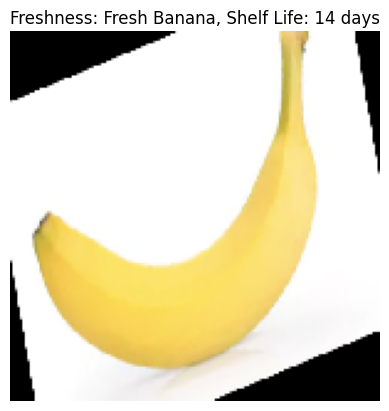

In [12]:

image_path = r'C:\Users\advai\OneDrive\Desktop\flipkart hackathon\freshness\freshbanana\b_f003.png'  
display_prediction(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


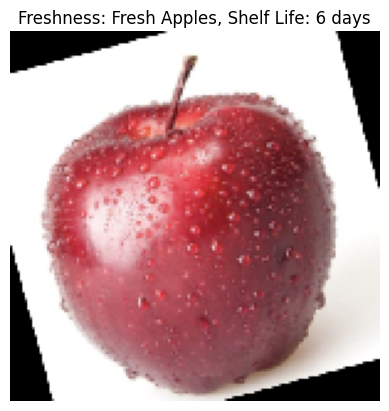

In [13]:

image_path = r'C:\Users\advai\OneDrive\Desktop\flipkart hackathon\freshness\freshapples\a_f032.png'
display_prediction(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


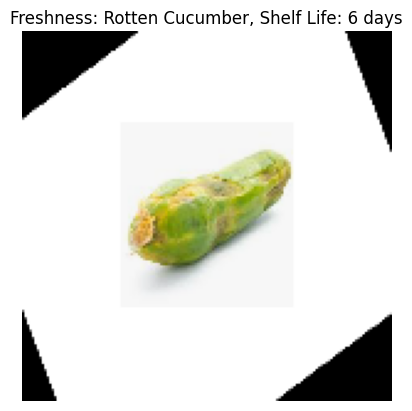

In [14]:

image_path = r'C:\Users\advai\OneDrive\Desktop\flipkart hackathon\freshness\rottencucumber\c_r003.png'  
display_prediction(image_path)

In [15]:
freshness_model.save('freshness_model.h5')
shelf_life_model.save('shelf_life_model.h5')